In [1]:
!pip install pyspark


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import sklearn
import random
import os
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql import SparkSession 
from pyspark.ml  import Pipeline     
from pyspark.sql import SQLContext  
from pyspark.sql.functions import mean,col,split, col, regexp_extract, when, lit
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import QuantileDiscretizer

In [3]:
spark = SparkSession \
.builder \
.appName("Covid 19 Data Analysis with pyspark") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()

In [4]:
df = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("/FileStore/tables/*.csv",header=True)

In [5]:
df.printSchema()

root
-- FIPS: string (nullable = true)
-- Admin2: string (nullable = true)
-- Province_State: string (nullable = true)
-- Country_Region: string (nullable = true)
-- Last_Update: string (nullable = true)
-- Lat: string (nullable = true)
-- Long_: string (nullable = true)
-- Confirmed: string (nullable = true)
-- Deaths: string (nullable = true)
-- Recovered: string (nullable = true)
-- Active: string (nullable = true)
-- Combined_Key: string (nullable = true)
-- Incidence_Rate: double (nullable = true)
-- Case-Fatality_Ratio: double (nullable = true)

In [6]:
df.createOrReplaceTempView("covid")

In [7]:
display(df)

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
null,null,null,Afghanistan,2020-08-16 04:27:42,33.93911,67.709953,37551,1370,27166,9015,Afghanistan,96.46185538705593,3.6483715480280154
null,null,null,Albania,2020-08-16 04:27:42,41.1533,20.1683,7260,225,3746,3289,Albania,252.27604420043087,3.0991735537190084
null,null,null,Algeria,2020-08-16 04:27:42,28.0339,1.6596,38133,1360,26644,10129,Algeria,86.96030331593252,3.5664647418246664
null,null,null,Andorra,2020-08-16 04:27:42,42.5063,1.5218,989,53,863,73,Andorra,1280.0103539765742,5.358948432760364
null,null,null,Angola,2020-08-16 04:27:42,-11.2027,17.8739,1879,86,628,1165,Angola,5.717107887028731,4.576902607770091
null,null,null,Antigua and Barbuda,2020-08-16 04:27:42,17.0608,-61.7964,93,3,83,7,Antigua and Barbuda,94.96773139449392,3.225806451612903
null,null,null,Argentina,2020-08-16 04:27:42,-38.4161,-63.6167,289100,5637,205697,77766,Argentina,639.6615329790658,1.949844344517468
null,null,null,Armenia,2020-08-16 04:27:42,40.0691,45.0382,41495,817,34484,6194,Armenia,1400.328154982023,1.9689119170984455
null,null,Australian Capital Territory,Australia,2020-08-16 04:27:42,-35.4735,149.0124,113,3,110,0,"Australian Capital Territory, Australia",26.395701938799345,2.6548672566371683
null,null,New South Wales,Australia,2020-08-16 04:27:42,-33.8688,151.2093,3950,52,2994,904,"New South Wales, Australia",48.65730475486572,1.3164556962025316


In [8]:
confirmed_dataFrame = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("/FileStore/tables/confirmed_data/time_series_covid19_confirmed_global.csv",header=True)

deaths_dataFrame = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("/FileStore/tables/deaths_data/time_series_covid19_deaths_global.csv",header=True)


latest_data = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("/FileStore/tables/latest_data/08_19_2020.csv",header=True)

recoveries_dataFrame = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("/FileStore/tables/recoveries_data/time_series_covid19_recovered_global.csv",header=True)

apple_mobility = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("/FileStore/tables/apple_mobility/applemobilitytrends_2020_08_18.csv",header=True)

In [9]:

# Convert all the data frame into pandas 
confirmed_data = confirmed_dataFrame.toPandas()
deaths_data = deaths_dataFrame.toPandas()
latest_cases = latest_data.toPandas()
recovered_data = recoveries_dataFrame.toPandas()
apple_data = apple_mobility.toPandas()

In [10]:
confirmed_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20
0,None,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856
1,None,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967
2,None,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258
3,None,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024
4,None,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,None,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6230,6566,6764,7064,7412,7764,8204,8549,8916,9228,9398,9744,10093,10306,10469,10621,10938,11284,11548,11837,12160,12297,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184,15491,15834,16153,16534,16844,17306,17606,17989
262,None,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
263,None,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1465,1498,1516,1526,1552,1576,1581,1606,1619,1629,1640,1654,1674,1674,1681,1691,1703,1711,1726,1728,1730,1734,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841,1847,1858,1858,1869,1882,1889,1892,1899
264,None,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1895,1895,1895,1895,1895,2810,2980,2980,3326,3386,3583,3789,3856,4328,4481,4552,5002,5249,5555,5963,6228,6347,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501,8663,9021,9186,9343,9839,9981,10218,10372


In [11]:
deaths_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20
0,None,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385
1,None,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,95,97,101,104,107,111,112,113,117,120,123,128,134,138,144,148,150,154,157,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238
2,None,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1011,1018,1028,1040,1052,1057,1068,1078,1087,1100,1111,1124,1136,1146,1155,1163,1174,1186,1200,1210,1223,1231,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333,1341,1351,1360,1370,1379,1391,1402,1411
3,None,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,53,53,53,53,53,53,53,53,53
4,None,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26,26,26,27,28,29,29,29,29,30,33,33,35,39,40,41,47,48,51,52,54,55,58,59,62,64,67,70,75,78,80,80,80,86,86,88,88,90,92,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,None,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36,39,44,44,51,53,59,62,63,64,66,67,70,75,76,78,79,80,81,82,83,84,84,86,89,92,94,96,97,100,104,105,106,106,108,110,113,113,119,120
262,None,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
263,None,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,417,424,429,433,438,440,443,445,447,456,458,461,469,474,479,483,484,485,487,493,494,497,499,506,508,508,512,512,515,518,523,528,528,528,528,530,535,537,539,541
264,None,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,42,42,42,42,42,109,120,120,128,128,128,134,136,139,139,140,142,146,149,151,165,170,171,173,176,199,200,203,235,241,241,246,246,256,260,260,264,264,269,274


In [12]:
latest_cases

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,None,None,Afghanistan,2020-08-20 04:27:43,33.939110,67.709953,37599,1375,27166,9058.0,Afghanistan,96.585159,3.657012
1,NaN,None,None,Albania,2020-08-20 04:27:43,41.153300,20.168300,7812,234,3928,3650.0,Albania,271.457363,2.995392
2,NaN,None,None,Algeria,2020-08-20 04:27:43,28.033900,1.659600,39847,1402,27971,10474.0,Algeria,90.868990,3.518458
3,NaN,None,None,Andorra,2020-08-20 04:27:43,42.506300,1.521800,1024,53,875,96.0,Andorra,1325.309001,5.175781
4,NaN,None,None,Angola,2020-08-20 04:27:43,-11.202700,17.873900,2015,92,698,1225.0,Angola,6.130906,4.565757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,NaN,None,None,West Bank and Gaza,2020-08-20 04:27:43,31.952200,35.233200,17606,119,10312,7175.0,West Bank and Gaza,345.119865,0.675906
3945,NaN,None,None,Western Sahara,2020-08-20 04:27:43,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3946,NaN,None,None,Yemen,2020-08-20 04:27:43,15.552727,48.516388,1892,539,1055,298.0,Yemen,6.343466,28.488372
3947,NaN,None,None,Zambia,2020-08-20 04:27:43,-13.133897,27.849332,10218,269,9126,823.0,Zambia,55.581073,2.632609


In [13]:
recovered_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20
0,None,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681
1,None,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986
2,None,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13743,14019,14295,14792,15107,15430,15744,16051,16400,16646,16983,17369,17369,18076,18088,18837,19233,19592,20082,20537,20988,21419,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627,26004,26308,26644,27017,27347,27653,27971,28281
3,None,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,804,806,807,807,807,821,825,825,828,839,839,839,839,839,855,858,863,863,863,869,869,875,875
4,None,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,118,118,118,124,124,199,210,221,221,221,221,236,241,242,242,242,266,301,395,437,460,461,476,503,506,520,544,564,567,569,575,577,577,584,628,628,632,667,698,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,None,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,942,1084,1084,1084,1313,1492,1596,1921,1921,1932,1950,2720,2720,3282,3752,3752,3752,4833,5016,5077,5324,5390,5390,6419,6618,6907,7210,7706,7945,8045,8181,8369,9186,9382,9388,9838,9906,9939,10312,10682
249,None,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
250,None,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,659,675,685,694,695,695,701,712,714,741,751,762,779,780,797,833,840,849,856,862,862,862,863,863,894,898,907,910,913,915,915,937,949,1009,1013,1013,1045,1052,1055,1058
251,None,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1412,1412,1412,1412,1412,1450,1462,1462,1620,1620,1677,1677,1677,1953,2350,2815,3195,3285,3289,3803,4130,4493,4701,5109,5667,5786,6264,6431,6698,6802,7004,7233,7401,7586,8065,8412,8575,8776,9126,9126


In [14]:
apple_data

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18
0,country/region,Albania,driving,None,None,None,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,173.05,186.83,181.11,146.93,145.32,144.73,153.00,169.21,178.32,185.37,166.63,162.41,164.63,169.36,190.83,206.45,202.15,178.29,168.26,169.05,176.53,197.01,233.20,229.20,213.40,193.56,201.82,187.74,203.09,218.60,234.00,230.14,215.44,216.40,232.93,248.51,267.54,255.43,229.61,216.43
1,country/region,Albania,walking,None,None,None,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,130.70,123.84,109.81,118.08,120.04,126.14,137.78,128.27,137.61,107.59,136.33,127.42,128.96,131.30,133.39,137.95,116.08,134.41,131.60,125.50,121.19,124.26,156.25,137.10,152.20,140.26,152.96,144.52,150.49,151.17,140.72,163.50,166.27,168.27,161.58,165.29,181.54,143.41,165.42,162.47
2,country/region,Argentina,driving,None,None,None,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,51.81,55.92,32.09,48.76,51.68,53.34,54.05,65.19,63.43,41.21,66.69,54.61,55.66,57.26,67.02,63.70,37.80,53.91,56.84,58.40,59.01,64.67,64.46,37.16,55.03,57.82,58.69,57.83,66.13,63.37,36.89,55.64,57.49,59.57,60.74,71.67,71.08,43.32,42.59,53.91
3,country/region,Argentina,walking,None,None,None,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,...,36.90,39.11,23.59,36.60,39.72,40.32,39.18,47.81,43.67,32.06,50.69,43.16,41.49,42.23,49.10,46.25,32.78,41.44,44.63,46.32,46.18,48.13,48.92,31.31,44.05,49.23,47.49,43.61,48.15,48.86,27.78,43.74,45.29,46.27,47.79,55.35,52.62,33.36,36.19,44.18
4,country/region,Australia,driving,AU,None,None,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,...,102.37,85.70,94.02,94.33,98.70,100.16,106.12,103.27,84.93,88.73,89.78,92.33,93.33,98.55,98.50,75.84,83.95,87.17,91.46,92.73,98.44,101.88,88.20,87.57,86.67,88.74,87.77,92.37,90.20,73.91,78.69,82.83,85.36,89.13,95.89,93.84,79.57,81.30,83.35,85.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,county,York County,driving,None,Virginia,United States,100.0,100.96,111.03,111.97,136.50,136.17,104.60,117.02,101.29,104.50,106.65,131.32

In [15]:

columns = confirmed_data.keys()




In [16]:
confirmed = confirmed_data.loc[:, columns[4]:columns[-1]]
deaths = deaths_data.loc[:, columns[4]:columns[-1]]
recoveries = recovered_data.loc[:, columns[4]:columns[-1]]

In [17]:
dates = confirmed.keys()
total_world_cases = []
total_world_deaths = [] 
total_mortality_rate = []
total_recovery_rate = [] 
total_recovered = [] 
world_total_active = [] 

for i in dates:
    sum_of_confirmed_cases = confirmed[i].sum()
    sum_of_total_deaths = deaths[i].sum()
    sum_of_recovered = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    total_world_cases.append(sum_of_confirmed_cases)
    total_world_deaths.append(sum_of_total_deaths)
    total_recovered.append(sum_of_recovered)
    world_total_active.append(sum_of_confirmed_cases-sum_of_total_deaths-sum_of_recovered)
    
    # calculate rates
    total_mortality_rate.append(sum_of_total_deaths/sum_of_confirmed_cases)
    total_recovery_rate.append(sum_of_recovered/sum_of_confirmed_cases)


In [18]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def average_changes(data, window_size):
    average_changes = []
    for i in range(len(data)):
        if i + window_size < len(data):
            average_changes.append(np.mean(data[i:i+window_size]))
        else:
            average_changes.append(np.mean(data[i:len(data)]))
    return average_changes

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(total_world_cases)
world_confirmed_avg= average_changes(total_world_cases, window)
world_daily_increase_avg = average_changes(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_world_deaths)
world_death_avg = average_changes(total_world_deaths, window)
world_daily_death_avg = average_changes(world_daily_death, window)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = average_changes(total_recovered, window)
world_daily_recovery_avg = average_changes(world_daily_recovery, window)


# active 
world_active_avg = average_changes(world_total_active, window)


In [19]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
total_world_cases = np.array(total_world_cases).reshape(-1, 1)
total_world_deaths = np.array(total_world_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [20]:
prediction_days = 10
future_predictions = np.array([i for i in range(len(dates)+prediction_days)]).reshape(-1, 1)
updated_date = future_predictions[:-10]

In [21]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_predictions_dates = []
for i in range(len(future_predictions)):
    future_predictions_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

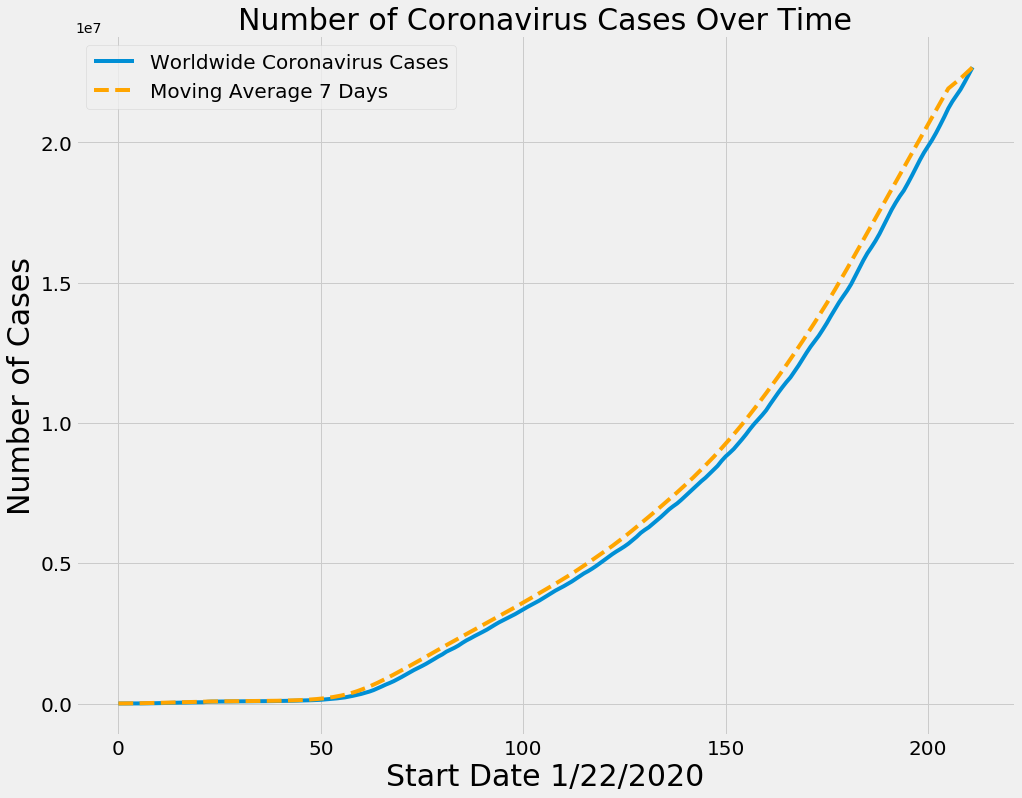

In [22]:

updated_date = updated_date.reshape(1, -1)[0]
plt.figure(figsize=(15, 12))
plt.plot(updated_date, total_world_cases)
plt.plot(updated_date, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Start Date 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


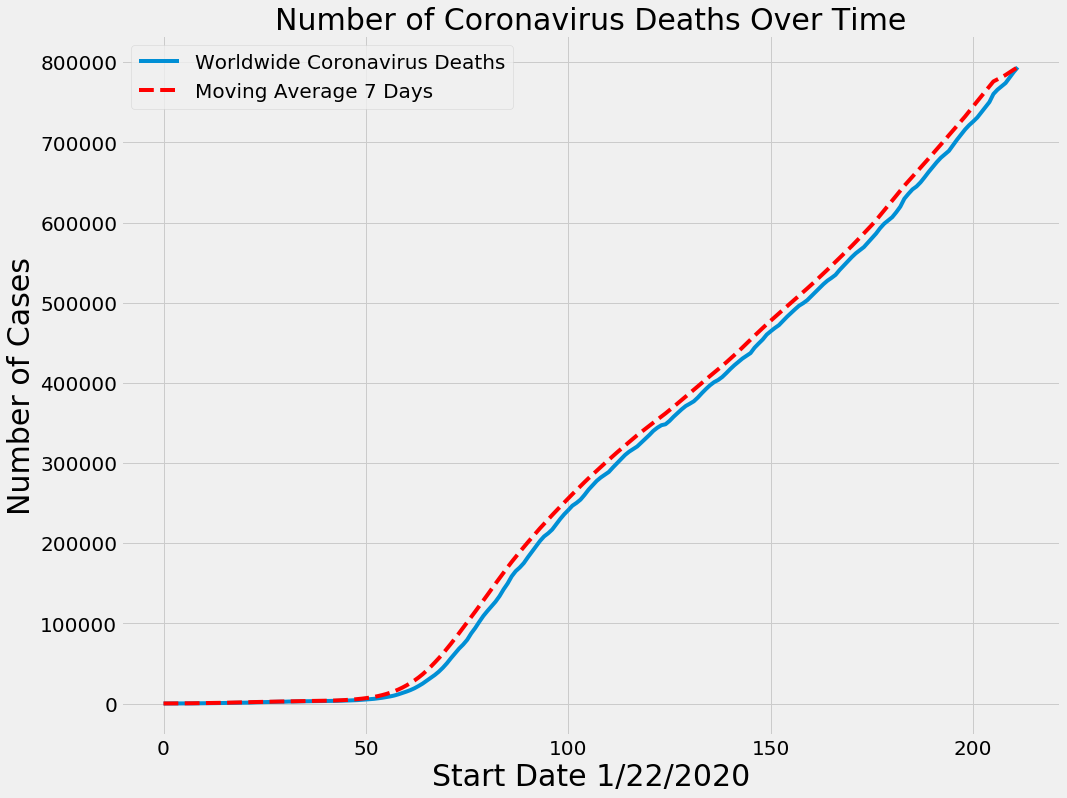

In [23]:
plt.figure(figsize=(15, 12))
plt.plot(updated_date, total_world_deaths)
plt.plot(updated_date, world_death_avg, linestyle='dashed', color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Start Date 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


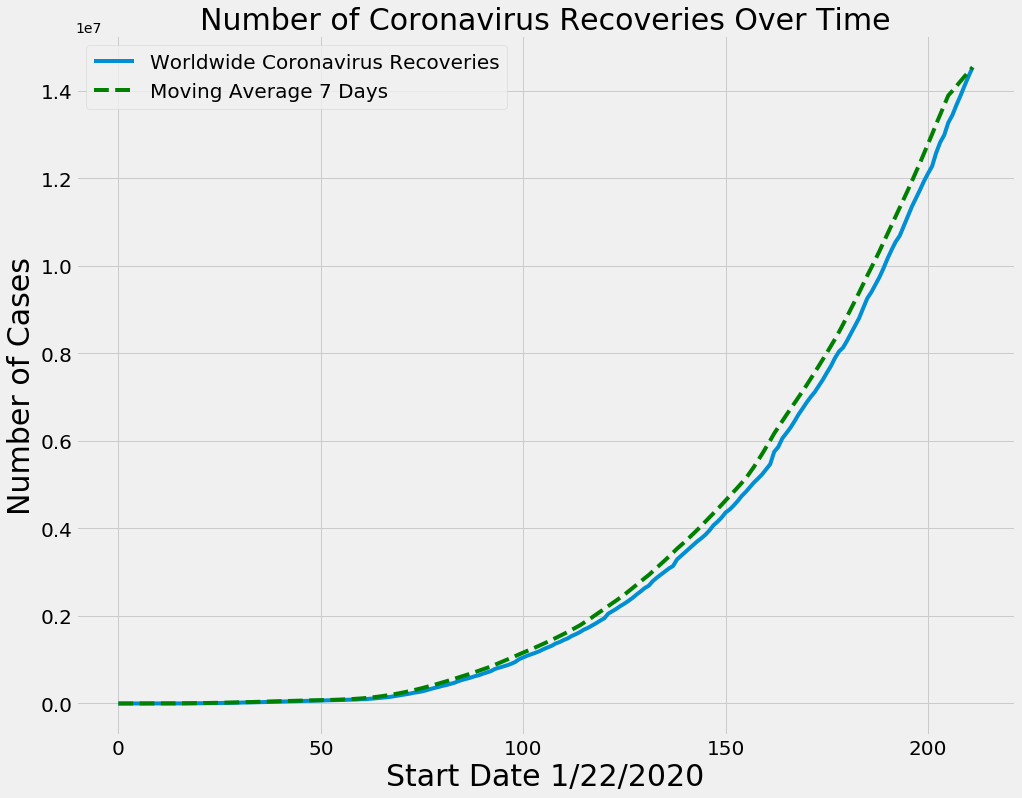

In [24]:
plt.figure(figsize=(15, 12))
plt.plot(updated_date, total_recovered)
plt.plot(updated_date, world_recovery_avg, linestyle='dashed', color='green')
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Start Date 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

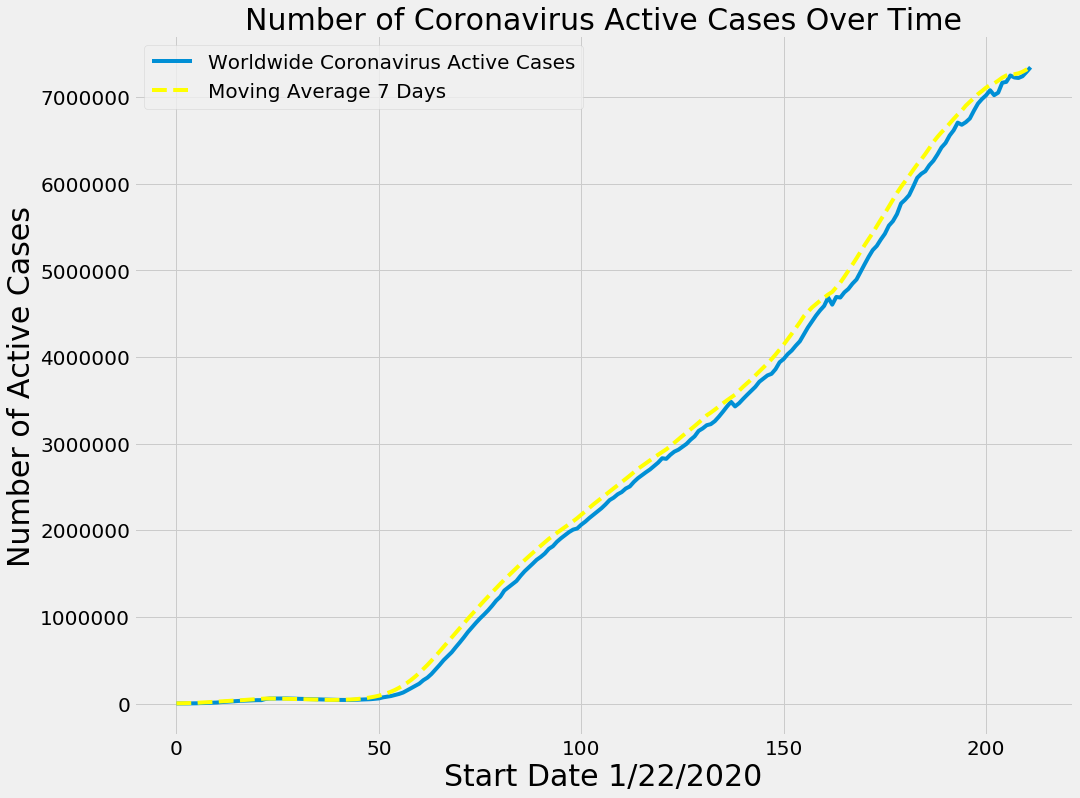

In [25]:
plt.figure(figsize=(15, 12))
plt.plot(updated_date, world_total_active)
plt.plot(updated_date, world_active_avg, linestyle='dashed', color='Yellow')
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Start Date 1/22/2020', size=30)
plt.ylabel('Number of Active Cases', size=30)
plt.legend(['Worldwide Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


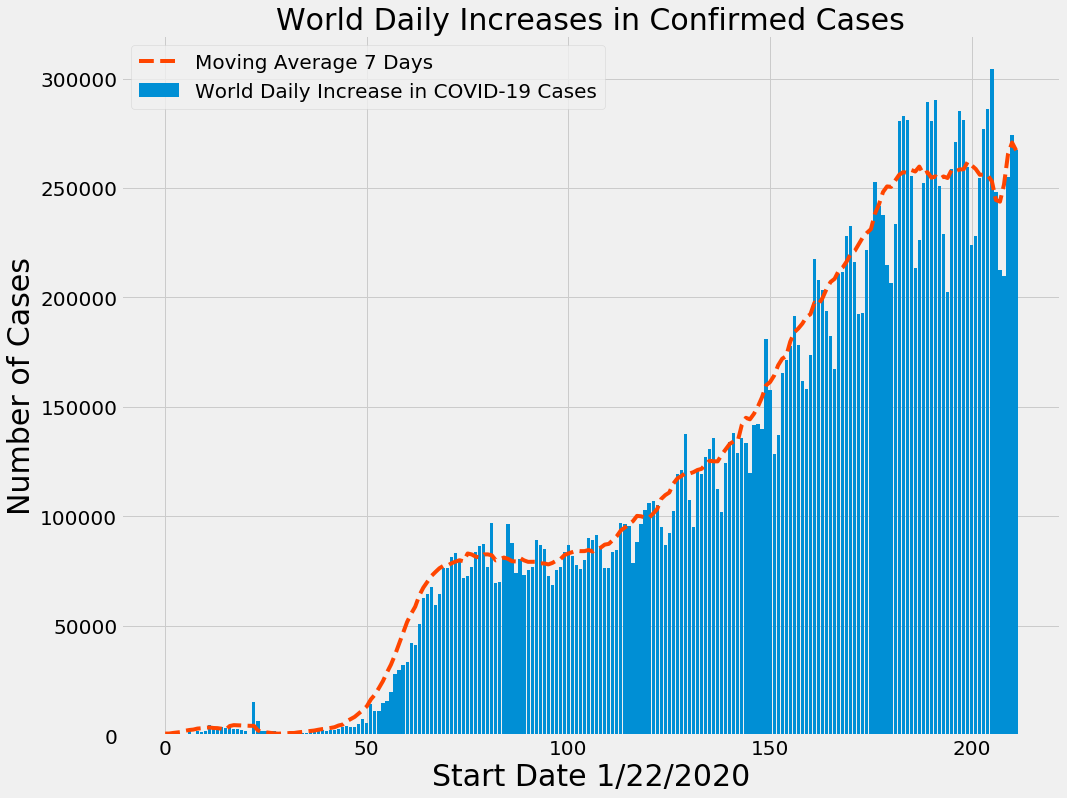

In [26]:

plt.figure(figsize=(15, 12))
plt.bar(updated_date, world_daily_increase)
plt.plot(updated_date, world_daily_increase_avg, color='OrangeRed', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Start Date 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


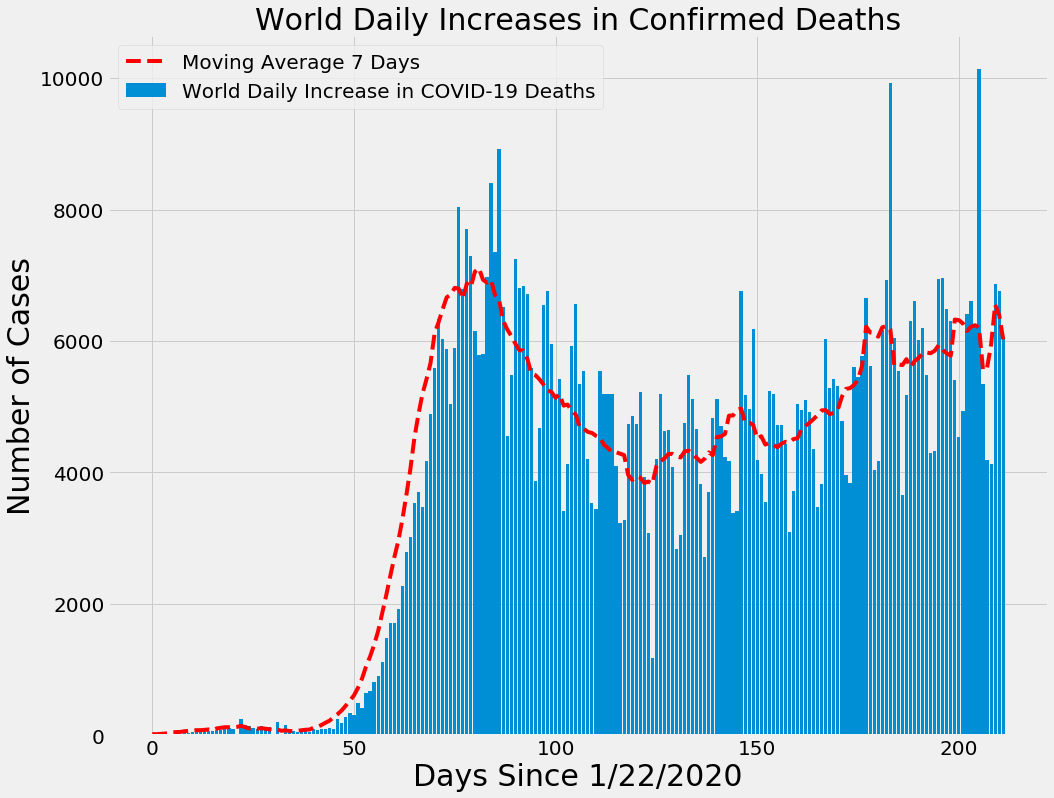

In [27]:
plt.figure(figsize=(15, 12))
plt.bar(updated_date, world_daily_death)
plt.plot(updated_date, world_daily_death_avg, color='Red', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

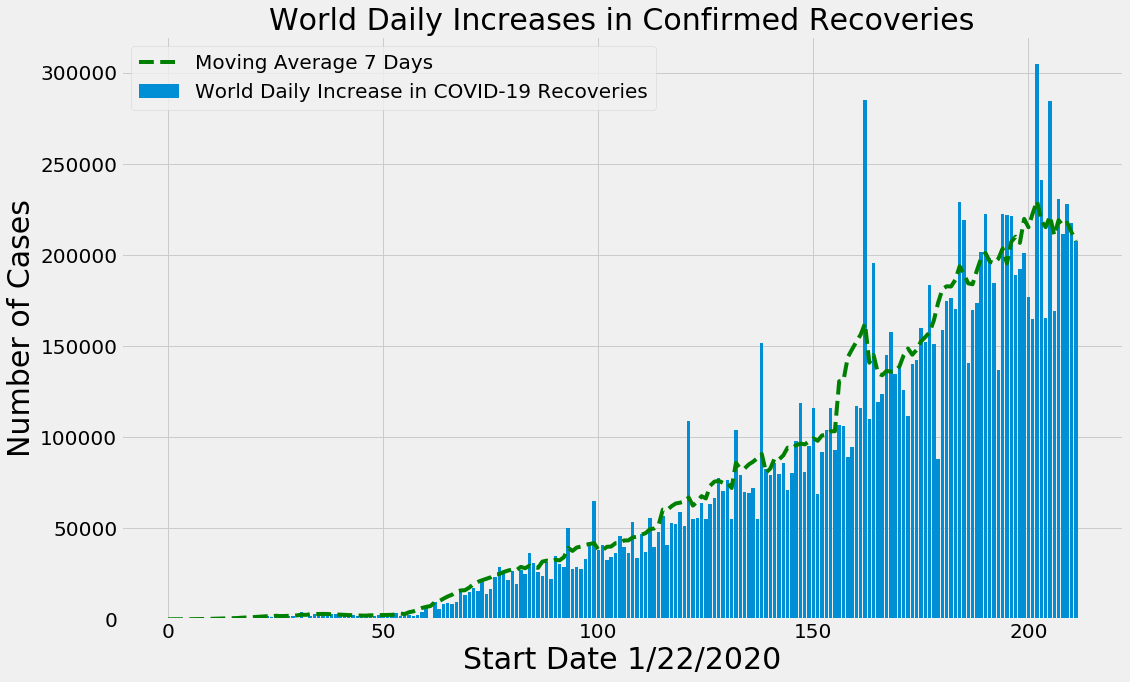

In [28]:
plt.figure(figsize=(16, 10))
plt.bar(updated_date, world_daily_recovery)
plt.plot(updated_date, world_daily_recovery_avg, color='Green', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Start Date 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

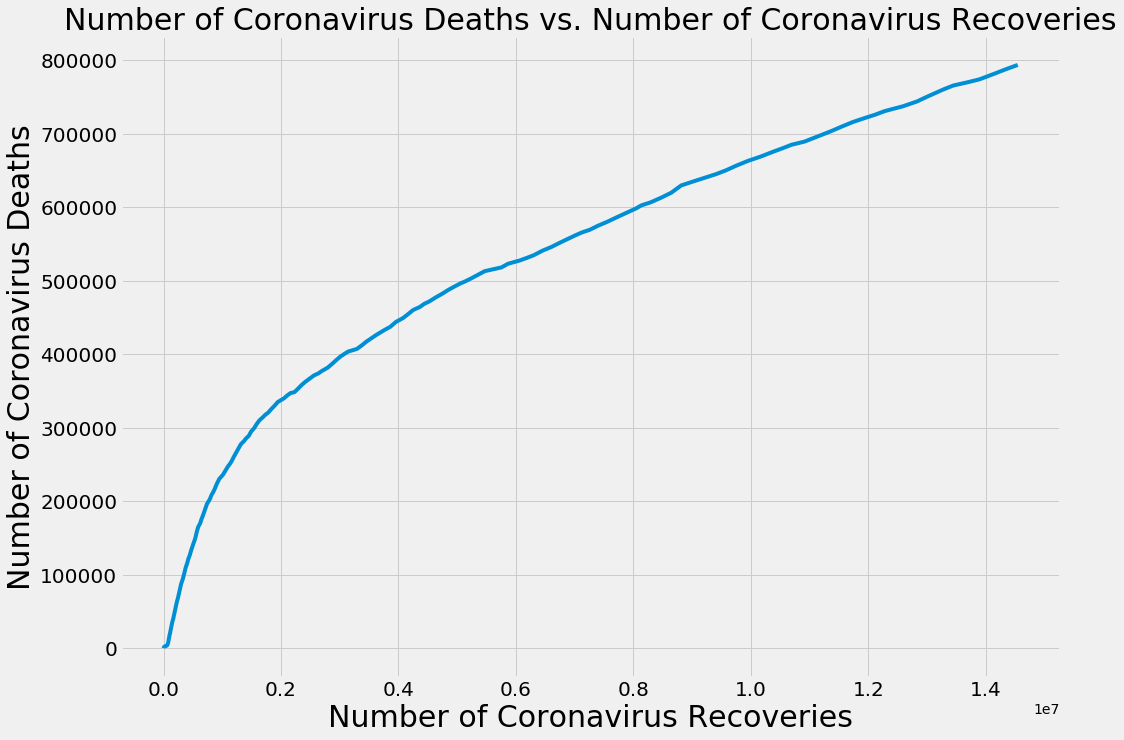

In [29]:
plt.figure(figsize=(15, 11))
plt.plot(total_recovered, total_world_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [30]:
("Luxembourg Coronavirus Cases...")
query = """
SELECT
    Country_Region, Last_Update, Confirmed, Deaths, Recovered, Active, Incidence_Rate
   
FROM
    covid
    
WHERE Country_Region in ('Luxembourg') 
"""
spark.sql(query).show()

Luxembourg Coronavirus Cases...
+--------------+-------------------+---------+------+---------+------+------------------+
Country_Region| Last_Update|Confirmed|Deaths|Recovered|Active| Incidence_Rate|
+--------------+-------------------+---------+------+---------+------+------------------+
 Luxembourg|2020-08-16 04:27:42| 7439| 123| 6500| 816|1188.3842192032919|
 Luxembourg|2020-08-11 04:35:08| 7216| 121| 6170| 925|1152.7598502178998|
 Luxembourg|2020-08-15 04:27:31| 7405| 122| 6500| 783|1182.9527010620216|
 Luxembourg|2020-08-09 04:34:54| 7169| 120| 5848| 1201| 1145.251575140261|
 Luxembourg|2020-08-10 04:34:55| 7205| 120| 5848| 1237| 1151.002594348665|
 Luxembourg|2020-08-14 04:51:19| 7368| 122| 6414| 832|1177.0419313200507|
 Luxembourg|2020-08-08 04:34:53| 7113| 119| 5848| 1146|1136.3055452605208|
 Luxembourg|2020-08-13 04:29:15| 7300| 122| 6262| 916|1166.1788950375094|
 Luxembourg|2020-08-12 04:27:29| 7242| 122| 6222| 898|1156.9133640906364|
 Luxembourg|2020-08-07 04:35:11| 7073| 119| 5750| 1204|1129.9155239178501|
 Luxembourg|2020-08-06 04:35:02| 7007| 118| 5623| 1266|1119.3719887024424|
 Luxembourg|2020-08-05 04:34:43| 6917| 118| 5537| 1262|1104.9944406814318|
 Luxembourg|2020-07-31 04:35:18| 6616| 114| 5027| 1475|1056.9095300778304|
 Luxembourg|2020-07-30 04:35:05| 6533| 114| 4959| 1460|1043.6502357917875|
 Luxembourg|2020-07-25 04:47:39| 6056| 112| 4647| 1297| 967.4492312804324|
 Luxembourg|2020-08-04 04:41:59| 6864| 118| 5498| 1248|1096.5276624023925|
 Luxembourg|2020-08-03 04:34:35| 6855| 117| 5192| 1546|1095.0899076002913|
 Luxembourg|2020-08-02 04:34:47| 6793| 116| 5192| 1485|1085.1853745191506|
 Luxembourg|2020-08-01 04:36:27| 6695| 114| 5192| 1389|1069.5298222296062|
 Luxembourg|2020-07-21 04:38:46| 5639| 111| 4464| 1064| 900.8332587830844|
+--------------+-------------------+---------+------+---------+------+------------------+
only showing top 20 rows

In [31]:
print("Bangladesh Coronavirus Cases...")
query = """
SELECT
    Country_Region, Last_Update, Confirmed, Deaths, Recovered, Active, Incidence_Rate
   
FROM
    covid
    
WHERE Country_Region in ('Bangladesh') 
"""
spark.sql(query).show()

Bangladesh Coronavirus Cases...
+--------------+-------------------+---------+------+---------+------+------------------+
Country_Region| Last_Update|Confirmed|Deaths|Recovered|Active| Incidence_Rate|
+--------------+-------------------+---------+------+---------+------+------------------+
 Bangladesh|2020-08-16 04:27:42| 274525| 3625| 157635|113265|166.69259122793605|
 Bangladesh|2020-08-11 04:35:08| 260507| 3438| 150437|106632|158.18080999186208|
 Bangladesh|2020-08-15 04:27:31| 271881| 3591| 156623|111667|165.08714468861663|
 Bangladesh|2020-08-09 04:34:54| 255113| 3365| 146604|105144| 154.9055533227664|
 Bangladesh|2020-08-10 04:34:55| 257600| 3399| 148370|105831| 156.4156688837677|
 Bangladesh|2020-08-14 04:51:19| 269115| 3557| 154871|110687| 163.4076192999035|
 Bangladesh|2020-08-08 04:34:53| 252502| 3333| 145584|103585|153.32014450500432|
 Bangladesh|2020-08-13 04:29:15| 266498| 3513| 153089|109896|161.81856726004008|
 Bangladesh|2020-08-12 04:27:29| 263503| 3471| 151972|108060| 159.9999922277929|
 Bangladesh|2020-08-07 04:35:11| 249651| 3306| 143824|102521| 151.589006803189|
 Bangladesh|2020-08-06 04:35:02| 246674| 3267| 141750|101657|149.78136143724578|
 Bangladesh|2020-08-05 04:34:43| 244020| 3234| 139860|100926| 148.1698428610908|
 Bangladesh|2020-07-31 04:35:18| 234889| 3083| 132960| 98846|142.62546602655013|
 Bangladesh|2020-07-30 04:35:05| 232194| 3035| 130292| 98867|140.98905209936942|
 Bangladesh|2020-07-25 04:47:39| 218658| 2836| 120976| 94846|132.76994303876893|
 Bangladesh|2020-08-04 04:41:59| 242102| 3184| 137905|101013| 147.0052261960323|
 Bangladesh|2020-08-03 04:34:35| 240746| 3154| 136839|100753|146.18185800113173|
 Bangladesh|2020-08-02 04:34:47| 239860| 3132| 136253|100475|145.64387553750203|
 Bangladesh|2020-08-01 04:36:27| 237661| 3111| 135136| 99414| 144.3086346373646|
 Bangladesh|2020-07-21 04:38:46| 207453| 2668| 113556| 91229|125.96622576453515|
+--------------+-------------------+---------+------+---------+------+------------------+
only showing top 20 rows